<a href="https://www.kaggle.com/code/aayushsin7a/bank-marketing-classification?scriptVersionId=148863678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import the required libraries 

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Visualization libs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
print("All the libraries loaded successfully")

# We will read the dataset from UCI repository

!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
from zipfile import ZipFile
import requests
from io import BytesIO

print("Libraries loaded successfully; UCI repository is ready to be accessed")
  


All the libraries loaded successfully
Libraries loaded successfully; UCI repository is ready to be accessed


# Read the dataset 

In [2]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222)
# data (as pandas dataframes) 
#X = bank_marketing.data.features 
#y = bank_marketing.data.targets

In [3]:
# Define the URL of the ZIP file containing the dataset
zip_file_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Fetch the ZIP file and read the dataset
response = requests.get(zip_file_url)
with ZipFile(BytesIO(response.content)) as zf:
    with zf.open('bank-additional/bank-additional-full.csv') as f:
        bank_marketing = pd.read_csv(f, sep=';')
# Now, the 'bank_marketing' variable contains the dataset


In [4]:
type(bank_marketing)

pandas.core.frame.DataFrame

In [5]:
# Lets explore the data set 
bank_marketing.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Basic dataframe information 

In [6]:
print("The Shape of the dataframe - ",bank_marketing.shape)
bank_marketing.isnull().sum()
df = bank_marketing.dropna()


The Shape of the dataframe -  (41188, 21)


In [7]:
df.describe(include='O')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


# Input Variables
- age (numeric)
- job : type of job (categorical: “admin”, “blue-collar”, “entrepreneur”, “housemaid”, “management”, “retired”, “self-employed”, “services”, “student”, “technician”, “unemployed”, “unknown”)
- marital : marital status (categorical: “divorced”, “married”, “single”, “unknown”)
- education (categorical: “basic.4y”, “basic.6y”, “basic.9y”, “high.school”, “illiterate”, “professional.course”, “university.degree”, “unknown”)
- default: has credit in default? (categorical: “no”, “yes”, “unknown”)
- housing: has housing loan? (categorical: “no”, “yes”, “unknown”)
- loan: has personal loan? (categorical: “no”, “yes”, “unknown”)
- contact: contact communication type (categorical: “cellular”, “telephone”)
- month: last contact month of year (categorical: “jan”, “feb”, “mar”, …, “nov”, “dec”)
- day_of_week: last contact day of the week (categorical: “mon”, “tue”, “wed”, “thu”, “fri”)
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). The duration is not known before a call is performed, also, after the end of the call, y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: “failure”, “nonexistent”, “success”)
- emp.var.rate: employment variation rate — (numeric)
- cons.price.idx: consumer price index — (numeric)
- cons.conf.idx: consumer confidence index — (numeric)
- euribor3m: euribor 3 month rate — (numeric)
- nr.employed: number of employees — (numeric)

# Predict variable (desired target):

- y — has the client subscribed a term deposit? (binary: “1”, means “Yes”, “0” means “No”)

## The edu1cation column of the dataset has many categories and we need to reduce the categories for a better modelling. 
- The education column has the following categories:

In [8]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [9]:
# Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.
df['education'] = np.where(df['education']=='basic.4y','Basic',df['education'])
df['education'] = np.where(df['education']=='basic.6y','Basic',df['education'])
df['education'] = np.where(df['education']=='basic.9y','Basic',df['education'])

# alternatively
#df['education'] = np.where(df['education'].isin(['basic.4y', 'basic.6y', 'basic.9y']), 'Basic', df['education'])



In [10]:
df.education.unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [11]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [12]:
df.y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [13]:
df['y'] = np.where(df['y']=='no',0,df['y'])
df['y'] = np.where(df['y']=='yes',1,df['y'])

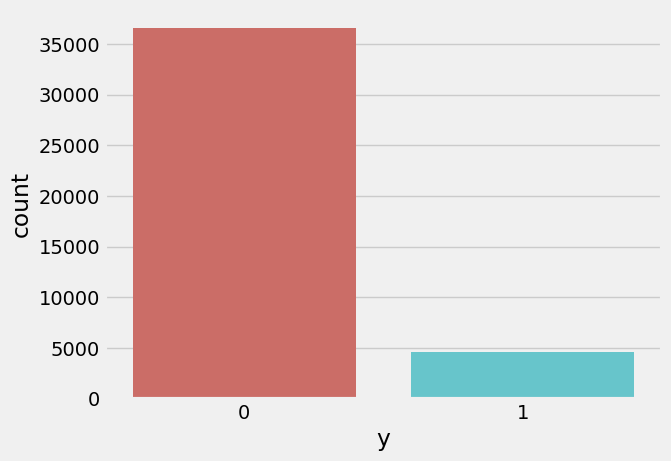

In [14]:
sns.countplot(x='y',data=df,palette='hls')
plt.show()

In [15]:
# It looks like we have imbalanced classes 
count_no_sub = len(df[df['y'] == 0])
count_sub = len(df[df['y'] == 1])

if count_no_sub + count_sub > 0:
    pct_of_no_sub = count_no_sub / (count_no_sub + count_sub)
    print("percentage of no subscription is", pct_of_no_sub * 100)
    
    pct_of_sub = count_sub / (count_no_sub + count_sub)
    print("percentage of subscription", pct_of_sub * 100)
else:
    print("No data with 'y' values of 0 or 1 in the DataFrame.")


percentage of no subscription is 88.73458288821988
percentage of subscription 11.265417111780131


- These classes are imbalanced, the ratio of non-subscription to subscription is 89:11
Before we go ahead and balance these classes, let's do some more exploration

In [16]:
df.head(4)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,Basic,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [17]:
#df.groupby('y').mean()

In [18]:
# Categorical Columns 
cat_cols = df.select_dtypes(include=['object','category'])

#Numerical Columns
num_cols = df.select_dtypes(include=['int64','float64'])

In [19]:
cat_cols

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,Basic,no,no,no,telephone,may,mon,nonexistent,0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0
3,admin.,married,Basic,no,no,no,telephone,may,mon,nonexistent,0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,1
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,0
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,0
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,1


In [20]:
num_cols

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


In [21]:
cat_cols.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

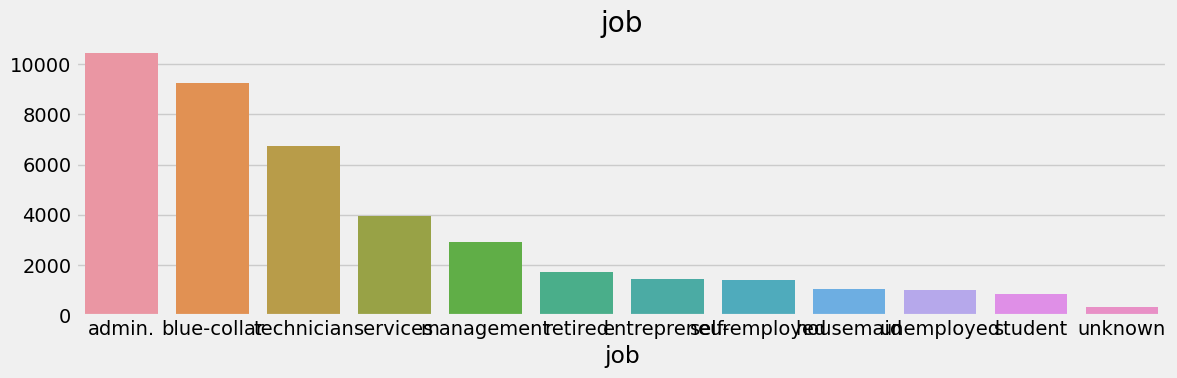

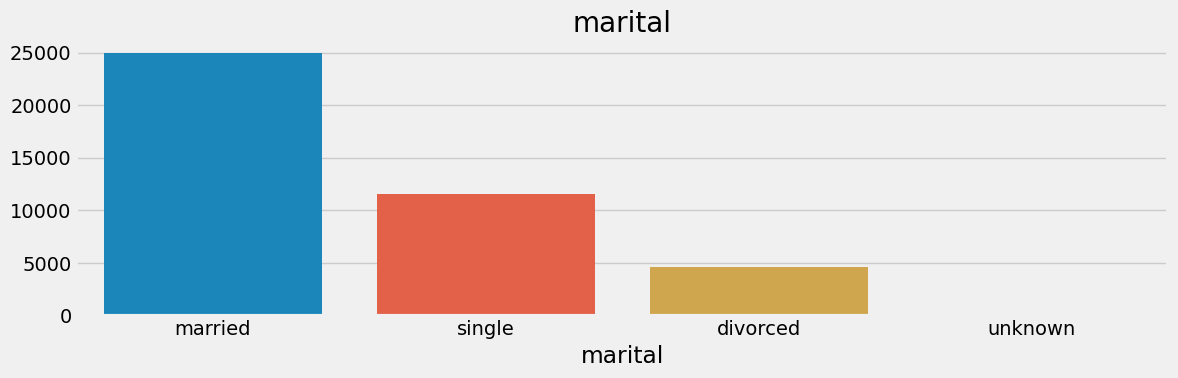

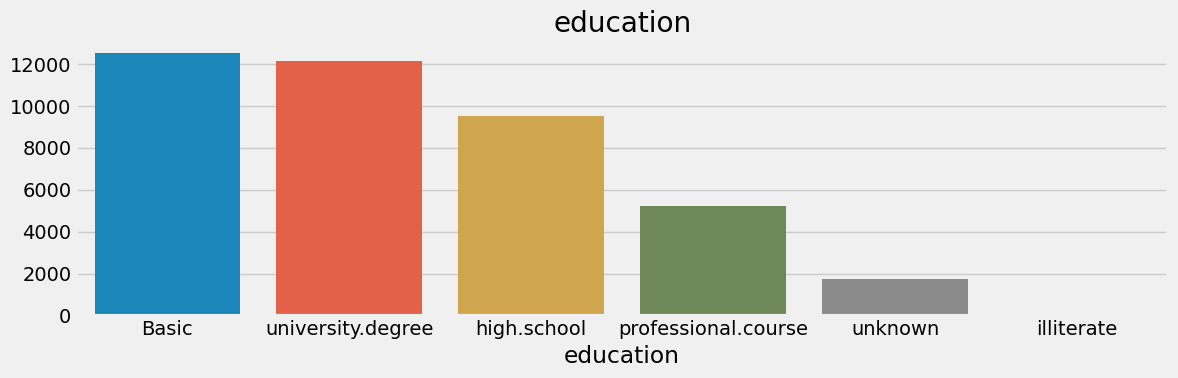

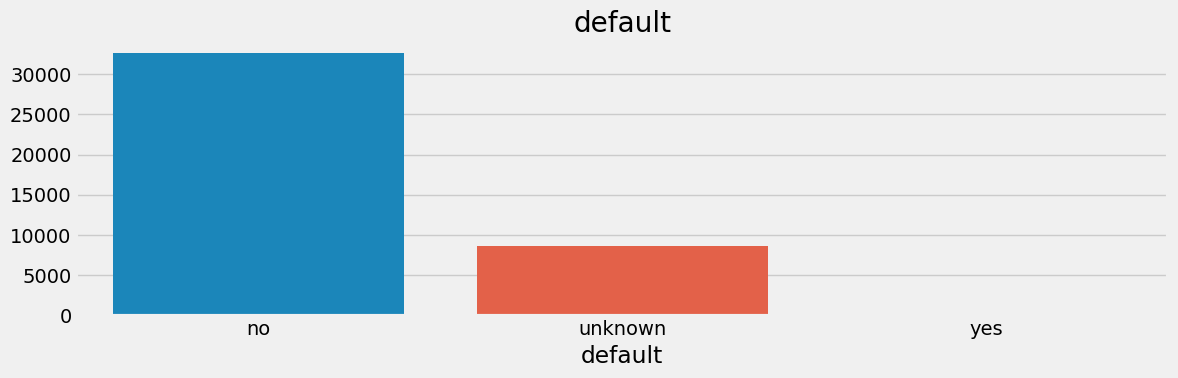

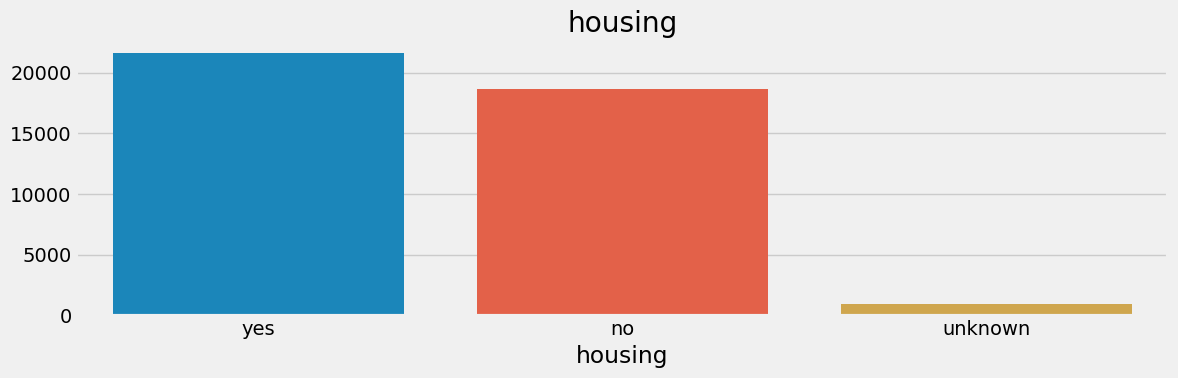

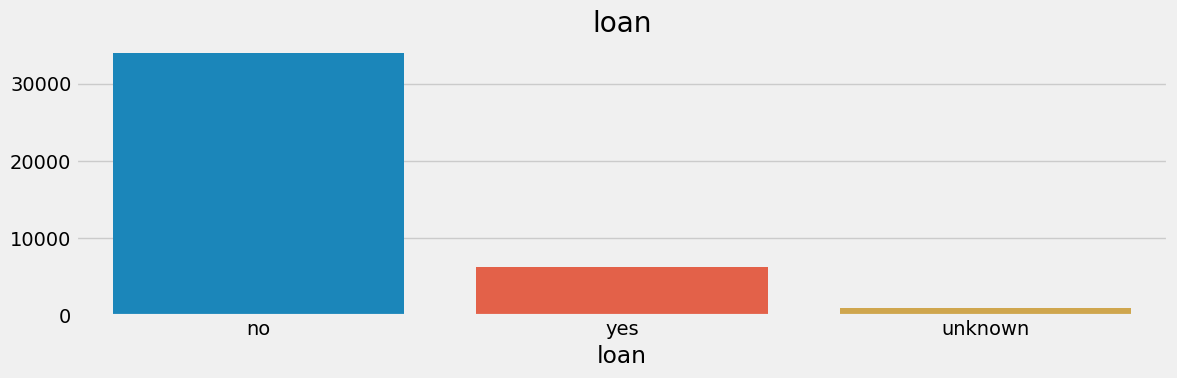

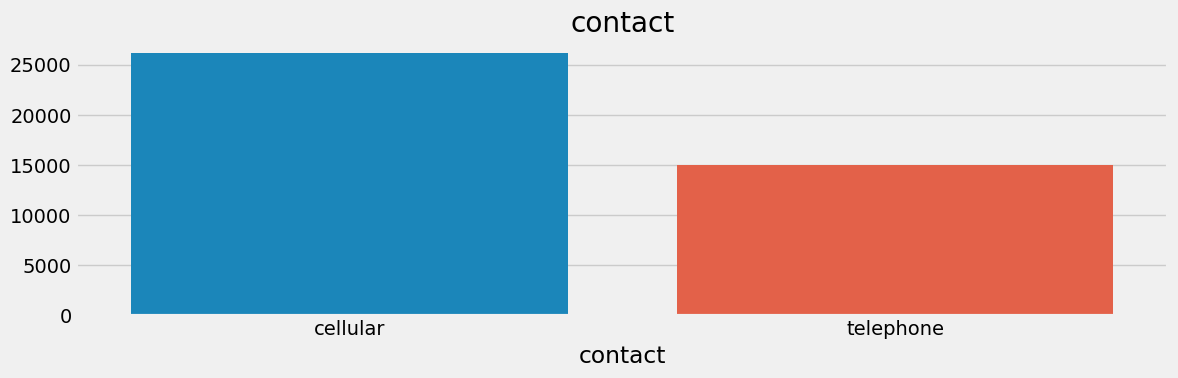

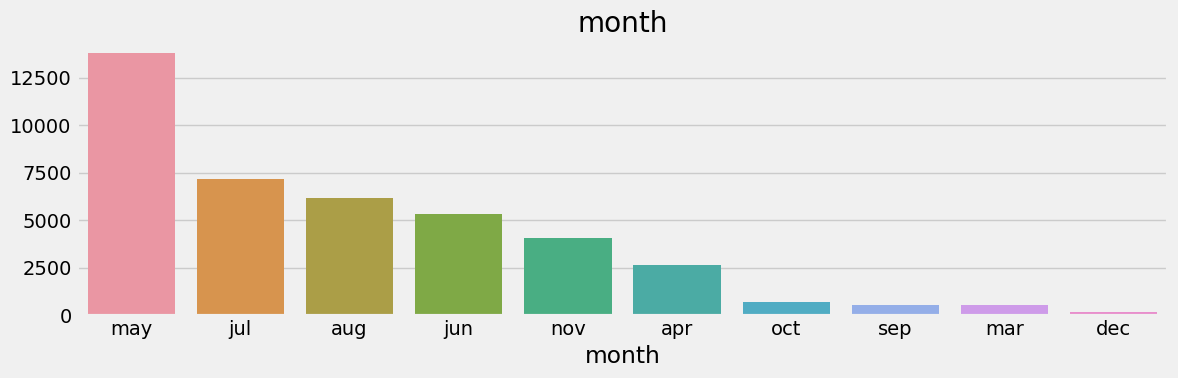

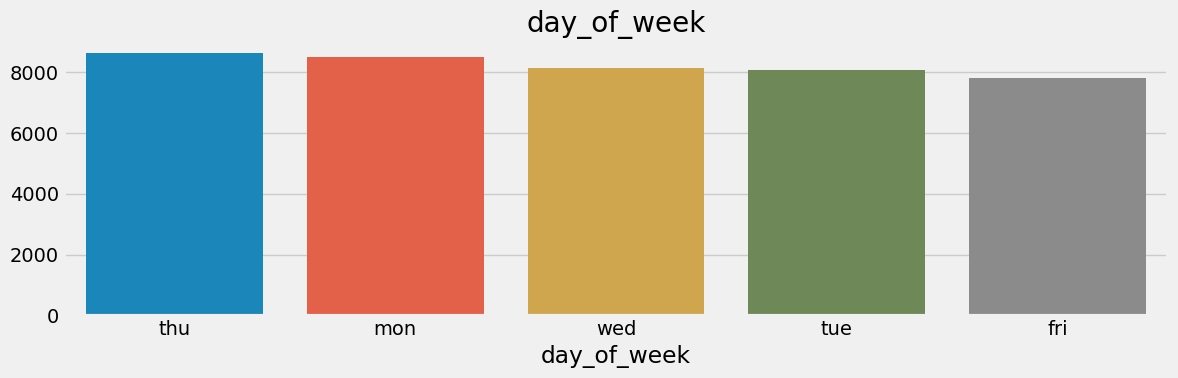

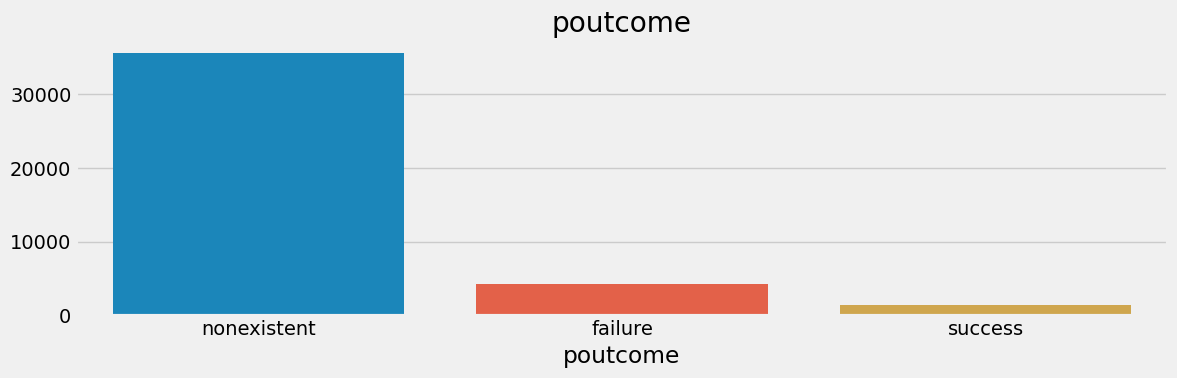

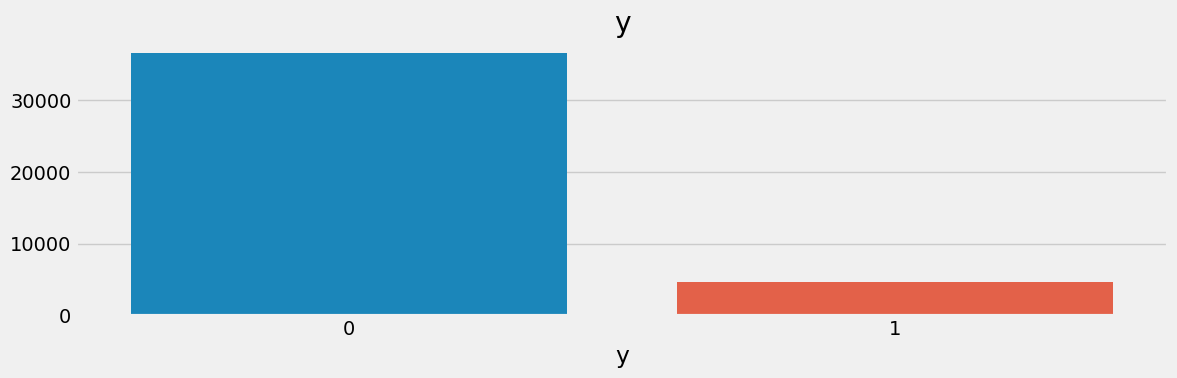

In [22]:
categorical_variables = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                         'month', 'day_of_week', 'poutcome', 'y']
for col in categorical_variables:
    plt.figure(figsize=(12,4))
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values)
    plt.title(col)
    plt.tight_layout()
    
plt.show()

In [23]:
for col in cat_cols:
    unique_values = df[col].unique()
    print(f'Unique values in {col}: {unique_values}')


Unique values in job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values in marital: ['married' 'single' 'divorced' 'unknown']
Unique values in education: ['Basic' 'high.school' 'professional.course' 'unknown' 'university.degree'
 'illiterate']
Unique values in default: ['no' 'unknown' 'yes']
Unique values in housing: ['no' 'yes' 'unknown']
Unique values in loan: ['no' 'yes' 'unknown']
Unique values in contact: ['telephone' 'cellular']
Unique values in month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
Unique values in day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
Unique values in poutcome: ['nonexistent' 'failure' 'success']
Unique values in y: [0 1]
